In [2]:
# Reference https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

words = open("Names.txt",'r').read().splitlines()
words = [w.lower() for w in words]
words[50:60]

['aadhithan',
 'aadhithiya',
 'aadhithya',
 'aadhithya varman',
 'aadhithyaa',
 'aadhityan',
 'aadhiyannal',
 'aadhunik',
 'aadhyatm',
 'aadi']

In [3]:
chars = sorted(list(set("".join(words))))

chars = chars[8:-1]

chars.append('.')
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

block_size=3 # context length: how many characters do we take to predict the next one?
X,Y=[],[]

for w in words[:10]:

  print(w)
  context = [0] * block_size
  #print(context)
  for ch in w +'.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append


X = torch.tensor(X)
Y = torch.tensor(Y)

aaban
... ---> a
..a ---> a
.aa ---> b
aab ---> a
aba ---> n
ban ---> .
aabharan
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> r
har ---> a
ara ---> n
ran ---> .
aabhas
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> s
has ---> .
aabhat
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> t
hat ---> .
aabheer
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> e
bhe ---> e
hee ---> r
eer ---> .
aabheer
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> e
bhe ---> e
hee ---> r
eer ---> .
abheer
... ---> a
..a ---> b
.ab ---> h
abh ---> e
bhe ---> e
hee ---> r
eer ---> .
aabher
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> e
bhe ---> r
her ---> .
aabi
... ---> a
..a ---> a
.aa ---> b
aab ---> i
abi ---> .
aabilesh
... ---> a
..a ---> a
.aa ---> b
aab ---> i
abi ---> l
bil ---> e
ile ---> s
les ---> h
esh ---> .


In [5]:
X.shape,X.dtype ,Y.shape,X.dtype

(torch.Size([73, 3]), torch.int64, torch.Size([73]), torch.int64)

In [6]:
Y

tensor([ 1,  1,  2,  1, 14,  0,  1,  1,  2,  8,  1, 18,  1, 14,  0,  1,  1,  2,
         8,  1, 19,  0,  1,  1,  2,  8,  1, 20,  0,  1,  1,  2,  8,  5,  5, 18,
         0,  1,  1,  2,  8,  5,  5, 18,  0,  1,  2,  8,  5,  5, 18,  0,  1,  1,
         2,  8,  5, 18,  0,  1,  1,  2,  9,  0,  1,  1,  2,  9, 12,  5, 19,  8,
         0])

In [7]:
# in the research paper there are 17,000 possible words (word level), and they reduced it into 30d space embeddings
# here we do character level , and we have 27 possible characters, so I reduce that into a 2D embedding

C=torch.randn((27,2))
C

tensor([[ 1.2951e+00, -1.1670e+00],
        [ 5.3265e-01, -3.4851e-01],
        [-6.8116e-01,  3.5429e-01],
        [ 4.9695e-01, -5.2877e-01],
        [-1.6199e-01, -7.7273e-04],
        [-3.4982e-01, -2.8576e-01],
        [-8.5500e-01,  1.5937e+00],
        [-3.8900e-01,  3.2021e-01],
        [ 6.7628e-01, -9.4858e-01],
        [-1.5602e+00, -3.0825e-01],
        [ 1.3372e+00,  1.3962e+00],
        [ 1.9182e-02, -2.7794e-01],
        [ 4.0532e-01,  3.0605e+00],
        [-6.0935e-01,  2.4195e-01],
        [-1.5852e+00, -1.9953e+00],
        [-1.5199e+00, -4.4399e-01],
        [ 3.1712e-01, -1.7612e-01],
        [ 9.9277e-01, -6.6411e-01],
        [-4.0747e-01,  6.3060e-02],
        [ 4.6735e-01,  3.0533e-01],
        [-1.8272e+00,  1.8502e+00],
        [-1.2539e+00,  1.9010e+00],
        [ 3.3591e-01,  2.3179e-01],
        [-6.1544e-01, -7.9743e-01],
        [ 6.3297e-01, -8.1310e-01],
        [ 1.7667e+00, -3.0741e-01],
        [ 7.7424e-01,  5.2406e-01]])

In [8]:
C[5]

tensor([-0.3498, -0.2858])

In [9]:
emb=F.one_hot(X,num_classes=27).float() @ C
emb.shape

torch.Size([73, 3, 2])

In [10]:
# for the second layer of the neural network
W1=torch.randn((6,100))# 6 weighs(  2 each for every neuron in the 2D space ) and 100 neurons
b1=torch.randn(100)

# we need to do emb@W1 +b , but it not possible because the embedding doesnot work, because the matrix shape is not the same to multiply

In [11]:
# forward pass
tanh=emb.view(-1,6) @ W1 +b1


# the third layer of the neural network is:
W2=torch.randn((100,27))
b2=torch.randn(27)

In [12]:
print(tanh.shape , W2.shape)

logits =  tanh @ W2 + b2
logits.shape

torch.Size([73, 100]) torch.Size([100, 27])


torch.Size([73, 27])

In [13]:
counts = logits.exp()
prob = counts/counts.sum(1,keepdim=True)

In [27]:
prob.shape , Y.shape
prob[torch.arange(X.shape[0]),Y]

tensor([1.5141e-21, 1.1253e-15, 1.2676e-06, 6.1957e-14, 2.9464e-07, 1.1951e-14,
        1.5141e-21, 1.1253e-15, 1.2676e-06, 2.6084e-14, 4.6155e-05, 2.1018e-34,
        1.1417e-07, 1.1880e-03, 1.5486e-16, 1.5141e-21, 1.1253e-15, 1.2676e-06,
        2.6084e-14, 4.6155e-05, 6.3279e-11, 1.0839e-06, 1.5141e-21, 1.1253e-15,
        1.2676e-06, 2.6084e-14, 4.6155e-05, 1.6401e-11, 2.9080e-20, 1.5141e-21,
        1.1253e-15, 1.2676e-06, 2.6084e-14, 6.4109e-15, 3.4837e-15, 4.2824e-09,
        6.9318e-02, 1.5141e-21, 1.1253e-15, 1.2676e-06, 2.6084e-14, 6.4109e-15,
        3.4837e-15, 4.2824e-09, 6.9318e-02, 1.5141e-21, 3.3300e-14, 1.0154e-11,
        6.4109e-15, 3.4837e-15, 4.2824e-09, 6.9318e-02, 1.5141e-21, 1.1253e-15,
        1.2676e-06, 2.6084e-14, 6.4109e-15, 1.0876e-31, 1.4968e-07, 1.5141e-21,
        1.1253e-15, 1.2676e-06, 3.1676e-24, 7.2900e-12, 1.5141e-21, 1.1253e-15,
        1.2676e-06, 3.1676e-24, 9.6353e-11, 1.1752e-38, 2.4384e-37, 9.5881e-21,
        1.3083e-09])

In [28]:
prob[torch.arange(X.shape[0]),Y].log()

tensor([-47.9395, -34.4207, -13.5784, -30.4123, -15.0375, -32.0580, -47.9395,
        -34.4207, -13.5784, -31.2775,  -9.9835, -77.5451, -15.9856,  -6.7355,
        -36.4040, -47.9395, -34.4207, -13.5784, -31.2775,  -9.9835, -23.4835,
        -13.7349, -47.9395, -34.4207, -13.5784, -31.2775,  -9.9835, -24.8337,
        -44.9842, -47.9395, -34.4207, -13.5784, -31.2775, -32.6808, -33.2907,
        -19.2688,  -2.6691, -47.9395, -34.4207, -13.5784, -31.2775, -32.6808,
        -33.2907, -19.2688,  -2.6690, -47.9395, -31.0332, -25.3132, -32.6808,
        -33.2907, -19.2688,  -2.6690, -47.9395, -34.4207, -13.5784, -31.2775,
        -32.6808, -71.2961, -15.7148, -47.9395, -34.4207, -13.5784, -54.1091,
        -25.6445, -47.9395, -34.4207, -13.5784, -54.1091, -23.0630, -87.3368,
        -84.3043, -46.0938, -20.4545])

In [29]:
# backward pass


In [30]:
counts

tensor([[4.9025e+04, 2.3969e+08, 1.0161e+07,  ..., 1.5989e-19, 1.3799e+03,
         1.6340e-10],
        [1.7733e+09, 4.8660e+05, 1.4399e+07,  ..., 2.6752e-16, 8.5825e+08,
         2.8627e-14],
        [2.6025e+02, 1.6418e+06, 7.8106e+08,  ..., 2.1210e-14, 1.3713e+12,
         9.4912e-14],
        ...,
        [1.4266e-09, 1.6538e+01, 6.9797e-16,  ..., 3.8140e-08, 5.7395e-03,
         4.4147e-12],
        [6.0594e+09, 4.3859e-06, 2.0592e+03,  ..., 6.4879e+00, 3.1375e+02,
         4.9956e-13],
        [4.5743e+00, 3.8758e+04, 3.7185e-02,  ..., 2.5955e-11, 1.2777e-05,
         2.1100e-08]])

In [31]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      if ch in chars:
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([404350, 3]) torch.Size([404350])
torch.Size([50439, 3]) torch.Size([50439])
torch.Size([50695, 3]) torch.Size([50695])


In [32]:
C = torch.randn((27, 2))

In [33]:
emb = C[X]
emb.shape

torch.Size([73, 3, 2])

In [34]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [35]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [36]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [37]:
logits = h @ W2 + b2

In [38]:
counts = logits.exp()

In [39]:
prob = counts / counts.sum(1, keepdims=True)

In [40]:
loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
loss

tensor(22.4781)

In [41]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [42]:
sum(p.nelement() for p in parameters)

11897

In [43]:
for p in parameters:
  p.requires_grad = True

In [44]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [45]:
lri = []
lossi = []
stepi = []

In [253]:
for i in range(446):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

2.325985908508301
1.9166467189788818
1.9605953693389893
2.0230321884155273
2.0795187950134277
2.368786096572876
2.331864833831787
2.3804430961608887
2.1661012172698975
2.3280351161956787
1.9809330701828003
2.2788496017456055
2.4924848079681396
2.091517448425293
2.4983675479888916
1.8971374034881592
2.3868863582611084
2.1891672611236572
2.144575595855713
2.220062494277954
1.7139593362808228
2.1776371002197266
2.2524361610412598
1.749436616897583
1.786877989768982
2.1772172451019287
2.0849449634552
2.45246958732605
2.436082601547241
2.480477809906006
2.4277751445770264
2.426407814025879
1.8767108917236328
2.0637457370758057
1.9551116228103638
1.8247452974319458
2.667980670928955
2.511199474334717
2.1227238178253174
1.9829543828964233
2.0847816467285156
1.5074491500854492
2.3572285175323486
2.0130794048309326
2.495462417602539
2.168588638305664
2.023843765258789
2.4763870239257812
2.269502878189087
1.7357470989227295
2.4629428386688232
2.3890678882598877
2.0122745037078857
1.5869261026382

In [254]:
loss

tensor(1.5757, grad_fn=<NllLossBackward0>)

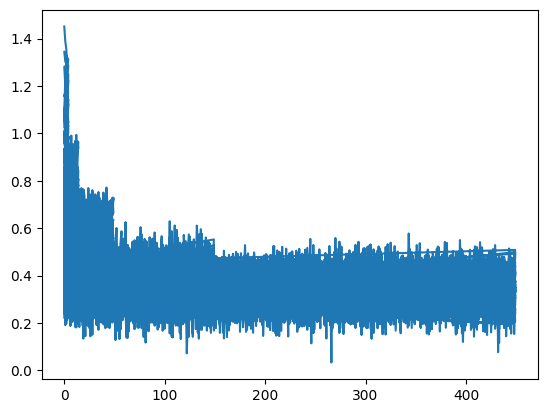

In [255]:
plt.plot(stepi, lossi)

In [256]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1283, grad_fn=<NllLossBackward0>)

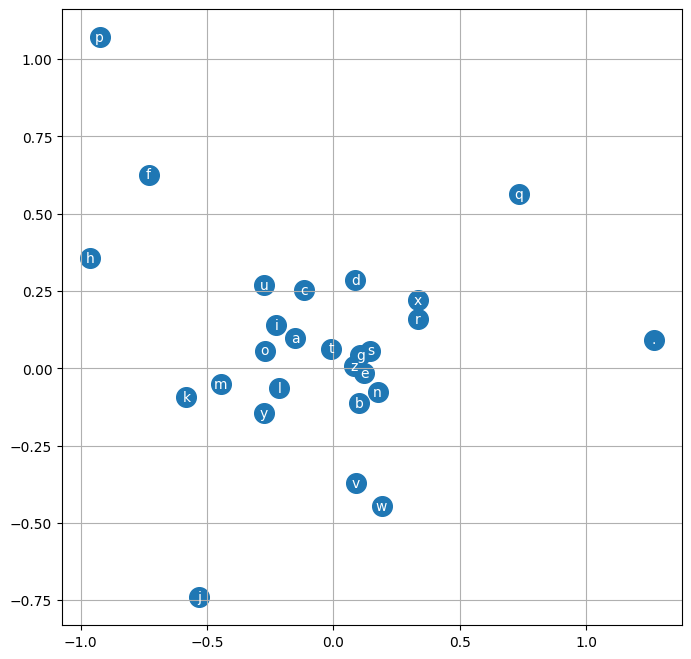

In [257]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [258]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [259]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mrithimyangheeswadhri.
amanthrujandraru.
adhardheli.
hemi.
padhaden.
vantharshathivhvarann.
shreergahi.
jesthi.
jeethushnithushnu.
amandh.
yashuvieh.
yivajayan.
yaathil.
aadyansun.
jajayventra.
tha.
nivekish.
pardhikhni.
yoghi.
priya.
